- Players A and B match pennies N times
- They keep a tally of their gains and losses
- *After the first toss, what is the chance that at no time during the game will they be even?*

____

**Note**: *"It is played between two players, Even and Odd. Each player has a penny and must secretly turn the penny to heads or tails. The players then reveal their choices simultaneously. If the pennies match (both heads or both tails), then Even keeps both pennies, so wins one from Odd (+1 for Even, −1 for Odd). If the pennies do not match (one heads and one tails) Odd keeps both pennies, so receives one from Even (−1 for Even, +1 for Odd)."*

- After the first toss, there are two possibilities
    1. A ahead by 1
    2. B ahead by 1
    
- They have $N-1$ tosses remaining

- Let's consider the possible paths when $N=3$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

In [4]:
array_flips = (np.array([-1, 1]),)*3
array_permutations = np.meshgrid(*array_flips)

In [14]:
df_paths = pd.DataFrame([x.ravel() for x in array_permutations]).cumsum()

In [15]:
df_paths

,0,1,2,3,4,5,6,7
0,-1,-1,1,1,-1,-1,1,1
1,-2,-2,0,0,0,0,2,2
2,-3,-1,-1,1,-1,1,1,3


- As we can see, the probability of reaching a tie at some point is 1/2

- Let's try $N=6$

In [17]:
array_flips = (np.array([-1, 1]),)*6
array_permutations = np.meshgrid(*array_flips)
df_paths = pd.DataFrame([x.ravel() for x in array_permutations]).cumsum()

In [23]:
len([x for x in df_paths.columns if (df_paths[x]==0).sum()>=1]),len(df_paths.columns)

(44, 64)

- For $N=6$, the probability is 11/16
    - **As we can see, the probability isn't just 1/2**

- Since each coin flip has two possible outcomes, there are $2^{N}$ different paths the game can take

- Let's visualize the simulated probabilities for different $N$ values

In [76]:
def sim(N, n_trials):
    array_flips = np.random.randint(0, 2, size=(N, 2, n_trials))
    array_sum = np.sum(array_flips, axis=1)
    array_boolean = (array_sum == 1).astype(int)
    array_score = np.cumsum(array_boolean + (-1 + array_boolean), axis=0)
    array_results = (np.sum(array_score == 0, axis=0)>0).astype(int)
    return np.mean(array_results)

In [87]:
n_trials = 100000
x = []
list_results = []

for N in range(2, 100):
    x.append(N)
    list_results.append(sim(N, n_trials))

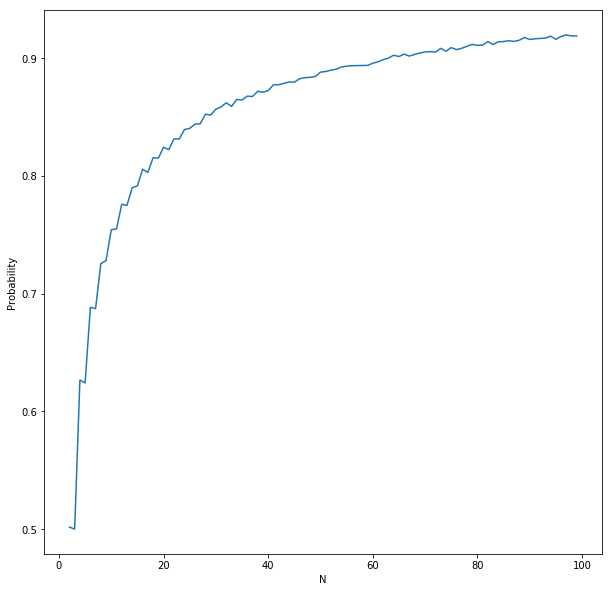

In [88]:
plt.plot(x, list_results)
plt.xlabel('N')
plt.ylabel('Probability')
plt.show()

- As we can see from the plot, the probabilities seem to only change for **every other $N$ value**
    - *Why?*
       - This is because you need two flips to tie
           - e.g. $P(\text{Tied at some point in 3 flips}) = P(\text{Tied at some point in 2 flips})$

- First, let's assume for simplicity that **$N$ is even**

- Then, there is some $n$ such that $N=2n$

- Now, let's assume that of the $N$ flips, A wins $x$ of them
    - There are three cases we need to consider:
        1. $x<n$ i.e. A wins less than half of the flips
        2. $x=n$ i.e. A wins exactly half the flips
        3. $x>n$ i.e. A wins more than half the flips

#### Scenario 1

- This is essentially the ballot box problem, so:

$$
P(\text{Tie at some point | Scenario 1}) = 2\cdot \frac{x}{N}
$$

#### Scenario 2

- Since they get the exact number of flips, they **must** tie so:

$$
P(\text{Tie at some point | Scenario 2}) = 1
$$

#### Scenario 3

- This again the ballot box problem, but reversed, so:

$$
P(\text{Tie at some point | Scenario 1}) = 2\cdot \frac{N-x}{N}
$$

- For each possible $x$ value, there are $\binom{N}{x}$ different paths with $x$ wins for A, and we know there are $2^{N}$ total possible paths for $N$ flips so

$$
P(x\text{ wins for A}) = \frac{\binom{N}{x}}{2^{N}}
$$

- So, we can combine all these to get (note: let $T$ represent the event that the two tie at some point in $N$ flips):

$$
P(T) = P(T \cap x=0) + P(T \cap x=1) + ... + P(T \cap x=N-1) + P(T \cap x=N)
$$

$$
=\frac{2}{2^{N}} \left ( \binom{N}{0}\frac{0}{N} +  \binom{N}{1}\frac{1}{N} + ... + \binom{N}{N-1}\frac{N-(N-1)}{N} + \binom{N}{N}\frac{N-N}{N} \right )
$$

- We note that the numerator for the term where $x=i$ is the same as the one where $x=N-i$
- We also note that $\binom{N}{x} = \binom{N}{N-x}$
    - Combining these two, we can convert this expression to:
    
$$
P(T) = \frac{2}{2^{N}}\left ( 2\cdot\sum_{x=0}^{x=n-1}\binom{N}{x}\frac{x}{N} + \binom{N}{n}\right )
$$

- I haven't written it out, but apparently this simplifies to:

$$
P(T) = \frac{2}{2^{N}}\left (2^{N-1} - \binom{N-1}{n} \right ) = 1 - \frac{\binom{N-1}{n}}{2^{N-1}}
$$

- Therefore, the probability that they never tie in the $N$ flips is equal to:

$$
P(\text{Never Tie}) = 1 - P(T) = \frac{\binom{N-1}{n}}{2^{N-1}}
$$

- Note: apparently, this expression can be rewritten as

$$
P(\text{Never Tie}) = \binom{N}{n}\frac{1}{2^{N}} = \binom{N}{N/2}\frac{1}{2^{N}}
$$

- Since when $N$ is odd, the probability doesn't change, we can use

$$
P(\text{Never Tie}) = \binom{N-1}{(N-1)/2}\frac{1}{2^{N-1}}
$$

_______

- Let's compare this value to our curve we simulated

In [97]:
from scipy.special import comb

In [102]:
list_probabilities = []
for N in x:
    if N % 2 == 0:
        P = 1-comb(N, N/2)/(2**N)
    list_probabilities.append(P)

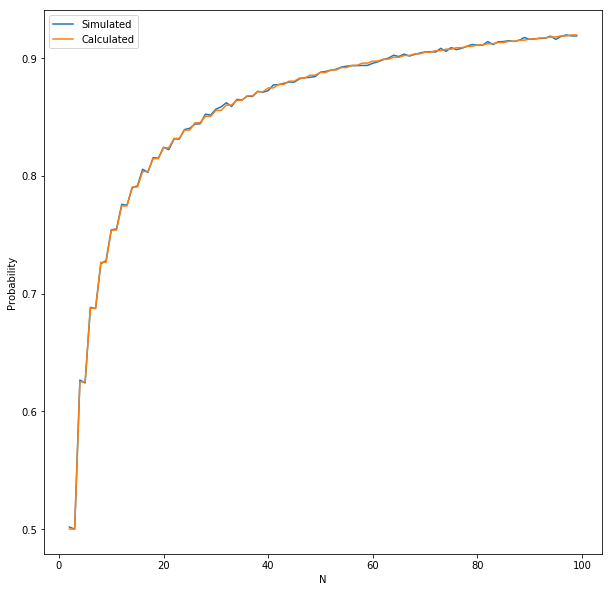

In [103]:
plt.plot(x, list_results, label = 'Simulated')
plt.plot(x, list_probabilities, label = 'Calculated')
plt.legend()
plt.xlabel('N')
plt.ylabel('Probability')
plt.show()

- Eyyyyy